# Check folders is exist

In [0]:
!pwd

In [0]:
!ls -l

In [0]:
!rm -rf precision-agriculture data dataset
!git clone https://github.com/yildizozan/precision-agriculture-computer-vision.git precision-agriculture && cd precision-agriculture && ls -l && sh prepare-infra.sh && ./download-dataset.sh && tree data
!pip3 install --upgrade pip
!pip3 install --upgrade setuptools
!pip3 install --upgrade image_slicer

In [4]:
import os
os.chdir('/content/precision-agriculture')
!pwd

/content/precision-agriculture


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

# Prepare Dataset

In [0]:
!rm -rf datas/
!mkdir -p \
datas/train/img \
datas/train_mask/img \
datas/test/img \
datas/test_mask/img \
datas/validation/img \
datas/validation_mask/img
!ls -lh datas/

from PIL import Image

def cropping(filename, source, target, min, max):
  for i in range(min, max):
    print('%d/%s.png' % (i, filename))

    image = Image.open(source + '%d/%s.png' % (i, filename))

    width, height = image.size
    for row in range(0, height, 256 ):
      for col in range(0, width, 256 ):
        if (row + 256 < (height // 256 + 1) * 256 and col + 256 < (width // 256 + 1) * 256):
          cropped_img = image.crop((col, row, col + 256, row + 256))
          cropped_img.save(target + '%s_%s_%s_%s.png' % ("{:02d}".format(i), filename, "{:02d}".format(row // 256), "{:02d}".format(col // 256)) )

    image.close()
    cropped_img.close()


cropping("rgbreg_crop", "dataset/", "datas/train/img/", 1, 18)
cropping("partialc_crop", "dataset/", "datas/train_mask/img/", 1, 18)

cropping("rgbreg_crop", "dataset/", "datas/test/img/", 18, 21)
cropping("partialc_crop", "dataset/", "datas/test_mask/img/", 18, 21)

cropping("rgbreg_crop", "dataset/", "datas/validation/img/", 1, 21)
cropping("truth_crop", "dataset/", "datas/validation_mask/img/", 1, 21)

## Check folders

In [0]:
!ls -l datas/train/img/ 

In [0]:
!du -d 1 -h datas

or

In [0]:
!tree datas

# Prepare Dataset

## Keras ImageDataGenerator

Found 1071 images belonging to 1 classes.
Found 1071 images belonging to 1 classes.
img/01_rgbreg_crop_00_00.png img/01_rgbreg_crop_00_00.png


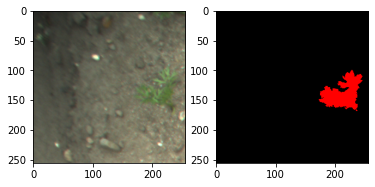

img/01_rgbreg_crop_00_01.png img/01_rgbreg_crop_00_01.png


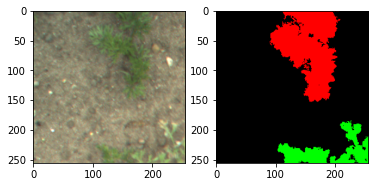

img/01_rgbreg_crop_00_02.png img/01_rgbreg_crop_00_02.png


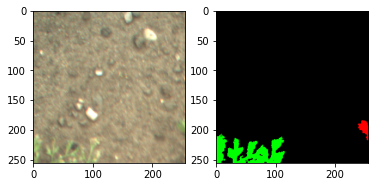

img/01_rgbreg_crop_00_03.png img/01_rgbreg_crop_00_03.png


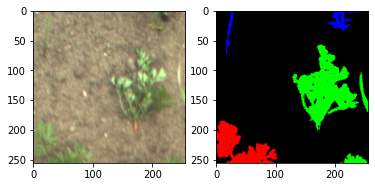

img/01_rgbreg_crop_00_04.png img/01_rgbreg_crop_00_04.png


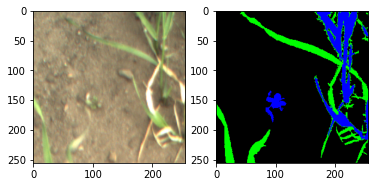

img/01_rgbreg_crop_00_05.png img/01_rgbreg_crop_00_05.png


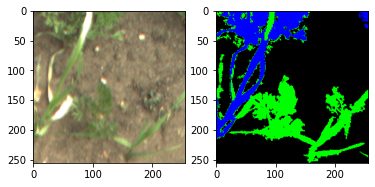

img/01_rgbreg_crop_00_06.png img/01_rgbreg_crop_00_06.png


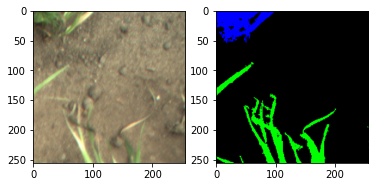

img/01_rgbreg_crop_00_07.png img/01_rgbreg_crop_00_07.png


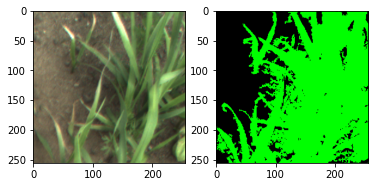

In [26]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

seed=1

basedir = "datas/"

# Old
data_gen_args = dict(rescale=1./255,
                     featurewise_center=True,
                     featurewise_std_normalization=True,
                     rotation_range=90,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     zoom_range=0.2)

data_gen_args = dict(rescale=1./255)

train_image_datagen = ImageDataGenerator(**data_gen_args)
train_mask_datagen = ImageDataGenerator(**data_gen_args)

train_image_generator = train_image_datagen.flow_from_directory(
    basedir + 'train',
    class_mode=None,
    batch_size=8,
    shuffle = False,
    seed=seed)

train_mask_generator = train_mask_datagen.flow_from_directory(
    basedir + 'train_mask',
    class_mode=None,
    batch_size=8,
    shuffle = False,
    seed=seed)

train_data = zip(train_image_generator, train_mask_generator)

x = train_image_generator.next()
y = train_mask_generator.next()

for i in range(0, 8):
  print(train_image_generator.filenames[i], train_image_generator.filenames[i])
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.imshow(x[i])
  ax2.imshow(y[i])
  plt.show()

Found 1260 images belonging to 1 classes.
Found 1260 images belonging to 1 classes.


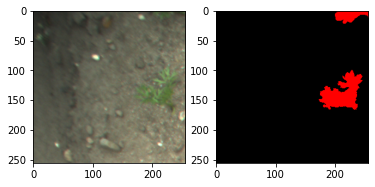

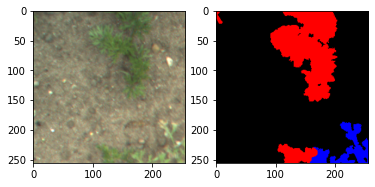

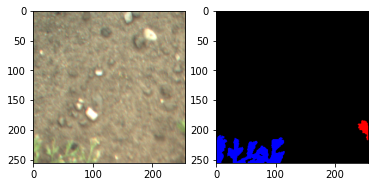

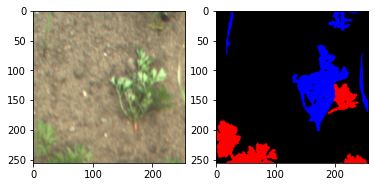

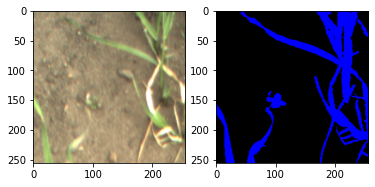

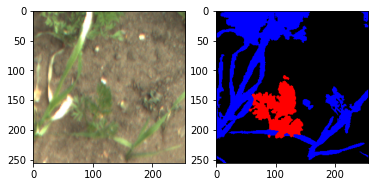

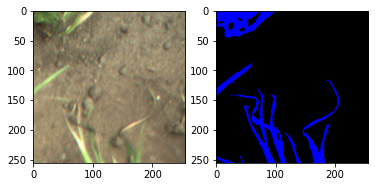

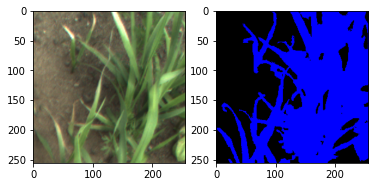

img/01_rgbreg_crop_00_00.png


In [27]:
val_image_datagen = ImageDataGenerator(**data_gen_args)
val_mask_datagen = ImageDataGenerator(**data_gen_args)

val_image_generator = val_image_datagen.flow_from_directory(
    basedir + 'validation',
    class_mode=None,
    batch_size=8,
    shuffle = False,
    seed=seed)

val_mask_generator = val_mask_datagen.flow_from_directory(
    basedir + 'validation_mask',
    class_mode=None,
    batch_size=8,
    shuffle = False,
    seed=seed)

validation_data = zip(val_image_generator, val_mask_generator)

x = val_image_generator.next()
y = val_mask_generator.next()

for i in range(0, 8):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.imshow(x[i])
  ax2.imshow(y[i])
  plt.show()

print(train_image_generator.filenames[0])

Found 189 images belonging to 1 classes.
Found 189 images belonging to 1 classes.


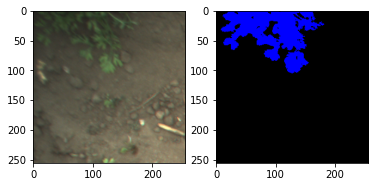

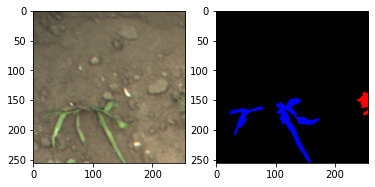

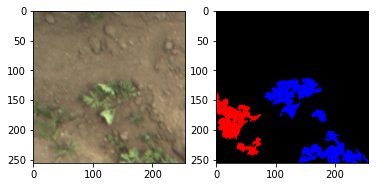

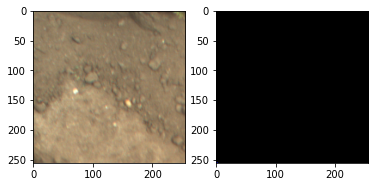

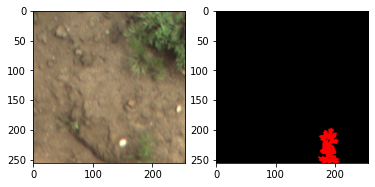

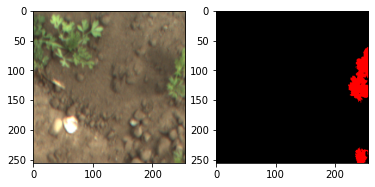

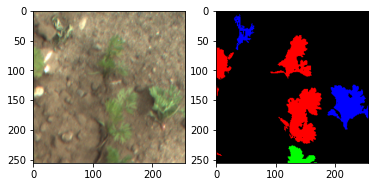

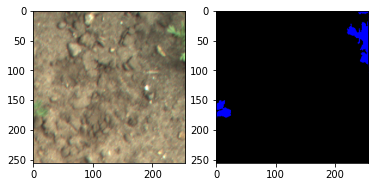

img/01_rgbreg_crop_00_00.png


In [28]:
test_image_datagen = ImageDataGenerator(**data_gen_args)
test_mask_datagen = ImageDataGenerator(**data_gen_args)

test_image_generator = test_image_datagen.flow_from_directory(
    basedir + 'test',
    class_mode=None,
    batch_size=8,
    shuffle = False,
    seed=seed)

test_mask_generator = test_mask_datagen.flow_from_directory(
    basedir + 'test_mask',
    class_mode=None,
    batch_size=8,
    shuffle = False,
    seed=seed)

test_data = zip(test_image_generator, test_mask_generator)

x = test_image_generator.next()
y = test_mask_generator.next()

for i in range(0, 8):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.imshow(x[i])
  ax2.imshow(y[i])
  plt.show()

print(train_image_generator.filenames[0])

# Segnet

In [0]:
from __future__ import absolute_import
from __future__ import print_function

import os
import glob
import cv2

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from keras.optimizers import Adam
from keras.layers import Input, Permute, Layer, MaxPooling2D, Dense, GlobalAveragePooling2D
from keras.layers.core import Activation, Flatten, Reshape
from keras.layers.convolutional import Conv2D, UpSampling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from keras.applications import imagenet_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [0]:
def max_square_loss(y_true, y_pred):
    eval = tf.keras.backend.abs(y_pred - y_true)
    eval = tf.keras.backend.mean(eval, axis=-1)
    return eval

In [0]:
def SegNet(input_shape=(256, 256, 3), classes=3, kernel=3, pool_size=(2,2)):
  img_h = input_shape[0]
  img_w = input_shape[1]

  #new_input_shape = (input_shape[2], input_shape[1], input_shape[0])

  model = Sequential()
  model.add(Layer(input_shape=input_shape))
  
  encoding_layers = [
      Conv2D(64, kernel, padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(64, kernel, padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D(pool_size=pool_size, data_format='channels_last'),

      Conv2D(128, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(128, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D(pool_size=pool_size, data_format='channels_last'),

      Conv2D(256, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(256, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(256, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D(pool_size=pool_size, data_format='channels_last'),

      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D(pool_size=pool_size, data_format='channels_last'),

      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      MaxPooling2D(pool_size=pool_size, data_format='channels_last'),

  ]

  decoding_layers = [
      UpSampling2D(size=(2,2), data_format='channels_last'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),

      UpSampling2D(size=(2,2), data_format='channels_last'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(512, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      
      UpSampling2D(size=(2,2), data_format='channels_last'),
      Conv2D(256, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(256, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(256, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      
      UpSampling2D(size=(2,2), data_format='channels_last'),
      Conv2D(128, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(128, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),

      UpSampling2D(size=(2,2), data_format='channels_last'),
      Conv2D(64, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),
      Conv2D(64, (kernel, kernel), padding='same'),
      BatchNormalization(),
      Activation('relu'),

  ]

  for l in encoding_layers:
      model.add(l)
      #print(l.input_shape,l.output_shape,l)

  for l in decoding_layers:
      model.add(l)
      #print(l.input_shape,l.output_shape,l)

  model.add(Conv2D(classes, (1, 1), padding='valid'))
  #model.add(GlobalAveragePooling2D())

  #model.add(Reshape((256*256, classes), input_shape=input_shape))
  #model.add(Permute((2, 1)))
  model.add(Activation('softmax'))
  
  opt = Adam(learning_rate=1)
  model.compile(loss=max_square_loss, optimizer=opt, metrics=["accuracy"])

  return model


input_shape = (256, 256, 3)
n_labels = 3
epochs = 100

model = SegNet(classes=n_labels)
model.summary()

# Train

In [34]:
!ls -lh datas/train/img | wc -l

1072


In [32]:
!ls -lah model.h5
!rm -rf model.h5

ls: cannot access 'model.h5': No such file or directory


In [0]:
filepath = "model.h5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

callbacks_list = [checkpoint]

# fit the model
history = model.fit_generator(
    train_data, 
    steps_per_epoch=1071//8, 
    validation_data=validation_data,
    validation_steps=1260//8,
    epochs=50,
    verbose=1,
    callbacks=callbacks_list
    )

Epoch 1/50
  3/133 [..............................] - ETA: 2:04:14 - loss: 0.2965 - accuracy: 0.3323

In [0]:
for key in ['loss', 'val_loss']:
    plt.plot(history.history[key],label=key)
plt.legend()
plt.show()

In [0]:
score = model.evaluate(test_image_generator, test_mask_generator, verbose=2)

In [0]:
predict = model.predict(test_image_generator)
for i in range(len(predict)):
  plt.imshow(predict[i])
  plt.show()

In [0]:

for i in range(10):
    img_is  = (X_test[i] + 1)*(255.0/2)
    seg = y_predi[i]
    segtest = y_testi[i]

    fig = plt.figure(figsize=(10,30))    
    ax = fig.add_subplot(1,3,1)
    ax.imshow(img_is/255.0)
    ax.set_title("original")
    
    ax = fig.add_subplot(1,3,2)
    ax.imshow(give_color_to_seg_img(seg,n_classes))
    ax.set_title("predicted class")
    
    ax = fig.add_subplot(1,3,3)
    ax.imshow(give_color_to_seg_img(segtest,n_classes))
    ax.set_title("true class")
    plt.show()

# Custom Generator

In [0]:
import cv2
import random

def data_generator(img_folder, mask_folder, batch_size):
  c = 1
  n = os.listdir(img_folder) #List of training images
  random.shuffle(n)
  
  while (True):
    img = np.zeros((batch_size, 2, 2, 3)).astype('float')
    mask = np.zeros((batch_size, 2, 2, 3)).astype('float')
    print(img)
    for i in range(c, c + batch_size): #initially from 0 to 16, c = 0. 

      train_img = cv2.imread('%s/%s/rgbreg_crop.png' % (img_folder, n[i]))/255.
      train_img = cv2.resize(train_img, (256, 256))# Read an image from folder and resize
      
      img[i-c] = train_img #add to array - img[0], img[1], and so on.
                                         

      train_mask = cv2.imread('%s/%s/partialc_crop.png' % (mask_folder, n[i]))/255.
      train_mask = cv2.resize(train_mask, (256, 256))
  
      mask[i-c] = train_mask

    c+=batch_size
    if(c+batch_size>=len(os.listdir(img_folder))):
      c=0
      random.shuffle(n)
                  # print "randomizing again"
    yield img, mask


def val_generator(img_folder, mask_folder, batch_size):
  c = 1
  n = os.listdir(img_folder) #List of training images
  random.shuffle(n)
  
  while (True):
    img = np.zeros((batch_size, 256, 256, 3)).astype('float')
    mask = np.zeros((batch_size, 256, 256, 3)).astype('float')
    print(img)
    for i in range(c, c + batch_size): #initially from 0 to 16, c = 0. 

      train_img = cv2.imread('%s/%d/rgbreg_crop.png' % (img_folder, n[i]))/255.
      train_img = cv2.resize(train_img, (256, 256))# Read an image from folder and resize
      
      img[i-c] = train_img #add to array - img[0], img[1], and so on.
                                                   

      train_mask = cv2.imread('%s/%d/truth_crop.png' % (mask_folder, n[i]))/255.
      train_mask = cv2.resize(train_mask, (256, 256))

      mask[i-c] = train_mask

    c+=batch_size
    if(c+batch_size>=len(os.listdir(img_folder))):
      c=0
      random.shuffle(n)
                  # print "randomizing again"
    yield img, mask


#train_frame_path = '/content/dataset/train/'
#train_mask_path = '/content/data/trainannot/'

#val_frame_path = '/content/data/val'
#val_mask_path = '/content/data/valannot'


train_frame_path = '/content/dataset'
train_mask_path = '/content/dataset'

val_frame_path = '/content/dataset'
val_mask_path = '/content/dataset'

# Train the model
train_gen = data_generator(train_frame_path,train_mask_path, batch_size=batch_size)
val_gen = val_generator(val_frame_path,val_mask_path, batch_size=batch_size)

# Train

In [0]:
model.fit_generator(
        train_gen,
        epochs=epochs,
        steps_per_epoch=20/batch_size,
        validation_data=val_gen,
        validation_steps=20/batch_size)

# Finish!

In [0]:
!ls -l /content/data/

total 296
drwxr-xr-x 2 root root  4096 Mar 31 14:30 test
drwxr-xr-x 2 root root  4096 Mar 31 14:30 testannot
-rw-r--r-- 1 root root   948 Mar 31 14:35 test.txt
drwxr-xr-x 2 root root 65536 Mar 31 14:35 train
drwxr-xr-x 2 root root 73728 Mar 31 14:35 trainannot
-rw-r--r-- 1 root root  5372 Mar 31 14:35 train.txt
drwxr-xr-x 2 root root 65536 Mar 31 14:36 val
drwxr-xr-x 2 root root 61440 Mar 31 14:36 valannot
-rw-r--r-- 1 root root     0 Mar 31 14:35 val.txt


In [0]:
!head /content/CA17/carrots_labelled/data/train.txt

data/train/01_rgbreg_crop_01_01.png data/trainannot/01_partialc_crop_01_01.png
data/train/01_rgbreg_crop_01_02.png data/trainannot/01_partialc_crop_01_02.png
data/train/01_rgbreg_crop_01_03.png data/trainannot/01_partialc_crop_01_03.png
data/train/01_rgbreg_crop_01_04.png data/trainannot/01_partialc_crop_01_04.png
data/train/02_rgbreg_crop_01_01.png data/trainannot/02_partialc_crop_01_01.png
data/train/02_rgbreg_crop_01_02.png data/trainannot/02_partialc_crop_01_02.png
data/train/02_rgbreg_crop_01_03.png data/trainannot/02_partialc_crop_01_03.png
data/train/02_rgbreg_crop_01_04.png data/trainannot/02_partialc_crop_01_04.png
data/train/03_rgbreg_crop_01_01.png data/trainannot/03_partialc_crop_01_01.png
data/train/03_rgbreg_crop_01_02.png data/trainannot/03_partialc_crop_01_02.png


In [0]:
import imageio
import numpy as np
from keras.utils import to_categorical

num_classes=3

def read_image_batch(data_path,batch_size):
    while True:
        image_list = open(data_path).readlines()
        l=len(image_list)
        print(image_list)
        num_batch=l//batch_size
        if num_batch*batch_size<l:
            num_batch+=1
        for i in range(num_batch):
            batch_set=image_list[batch_size*i:min(batch_size*(i+1),l)]
            batch_set=[bs.strip().split() for bs in batch_set]
            X=np.array([imageio.imread(line[0][1:]) for line in batch_set])
            labels=np.array([imageio.imread(line[1][1:]) for line in batch_set])
            y=to_categorical(labels, num_classes)
            yield tuple((X, y))

Using TensorFlow backend.


In [0]:
import os
import sys
from skimage.io import imread
import numpy as np

# img_width=303
# img_height=248
img_w = 256
img_h = 256
n_labels = 3

def label_map(labels):
    label_map = np.zeros([img_h, img_w, n_labels])    
    for r in range(img_h):
        for c in range(img_w):
            label_map[r, c, labels[r][c]] = 1
    return label_map


def prep_data(rootDir):
  data = []
  label = []
  n = n_train = 3

  i = 0
  for filename in os.listdir(rootDir):
    img, gt = [imread(rootDir + filename)], np.clip(imread(rootDir + filename), 0, 1)
    data.append(img)
    label.append(label_map(gt))
    sys.stdout.write('\r')
    sys.stdout.write("train: [%-20s] %d%%" % ('=' * int(20. * (i + 1) / n - 1) + '>',
                                                    int(100. * (i + 1) / n)))
    sys.stdout.flush()
    i += 1
  
  sys.stdout.write('\r')
  sys.stdout.flush()
  data, label = np.array(data), np.array(label).reshape((n, img_h * img_w, n_labels))

  print('OK')
  print('\tshapes: {}, {}'.format(data.shape, label.shape))
  print('\ttypes:  {}, {}'.format(data.dtype, label.dtype))
  print('\tmemory: {}, {} MB'.format(data.nbytes / 1048576, label.nbytes / 1048576))

  return data, label


test_data, test_label = prep_data("/content/CA17/carrots_labelled/data/train/")
print(test_data)
print(test_label)

FileNotFoundError: ignored

In [0]:
!ls data/train

In [0]:
# new new
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_image_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(256, 256),
    batch_size = 16)

train_mask_generator = train_datagen.flow_from_directory(
    'data/trainannot',
    target_size=(256, 256),
    batch_size = 16)

val_image_generator = val_datagen.flow_from_directory(
    'data/val',
    target_size=(256, 256),
    batch_size = 16)

val_mask_generator = val_datagen.flow_from_directory(
    'data/valannot',
    target_size=(256, 256),
    batch_size = 16)

train_generator = zip(train_image_generator, train_mask_generator)
val_generator = zip(val_image_generator, val_mask_generator)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [0]:
results = m.fit_generator(train_generator, epochs=NO_OF_EPOCHS, 
                          train_generator = (NO_OF_TRAINING_IMAGES//BATCH_SIZE),
                          validation_data=val_generator, 
                          validation_steps=(NO_OF_VAL_IMAGES//BATCH_SIZE), 
                          callbacks=callbacks_list)
m.save('Model.h5')

# Image data generator for segmentation

In [0]:
!pwd
!ls -l
!ls -l dataset/
!ls -l data/

#!rm -rf data
!mkdir -p data/train/img data/trainannot/img data/test/img data/testannot/img data/val/img data/valannot/img
#!ls -l data

# Train & Test
!cp dataset/1/rgbreg_crop.png data/train/img/
!cp dataset/2/rgbreg_crop.png data/train/img/
!cp dataset/3/rgbreg_crop.png data/train/img/
!cp dataset/4/rgbreg_crop.png data/train/img/
!cp dataset/5/rgbreg_crop.png data/train/img/
!cp dataset/6/rgbreg_crop.png data/train/img/
!cp dataset/7/rgbreg_crop.png data/train/img/
!cp dataset/8/rgbreg_crop.png data/train/img/
!cp dataset/9/rgbreg_crop.png data/train/img/
!cp dataset/10/rgbreg_crop.png data/train/img/
!cp dataset/11/rgbreg_crop.png data/train/img/
!cp dataset/12/rgbreg_crop.png data/train/img/
!cp dataset/13/rgbreg_crop.png data/train/img/
!cp dataset/14/rgbreg_crop.png data/train/img/
!cp dataset/15/rgbreg_crop.png data/train/img/
!cp dataset/16/rgbreg_crop.png data/train/img/

!cp dataset/17/rgbreg_crop.png data/test/img/
!cp dataset/18/rgbreg_crop.png data/test/img/
!cp dataset/19/rgbreg_crop.png data/test/img/
!cp dataset/20/rgbreg_crop.png data/test/img/

# Train & Test labelled
!cp dataset/1/partialc_crop.png data/train/img/
!cp dataset/2/partialc_crop.png data/train/img/
!cp dataset/3/partialc_crop.png data/train/img/
!cp dataset/4/partialc_crop.png data/train/img/
!cp dataset/5/partialc_crop.png data/train/img/
!cp dataset/6/partialc_crop.png data/train/img/
!cp dataset/7/partialc_crop.png data/train/img/
!cp dataset/8/partialc_crop.png data/train/img/
!cp dataset/9/partialc_crop.png data/train/img/
!cp dataset/10/partialc_crop.png data/train/img/
!cp dataset/11/partialc_crop.png data/train/img/
!cp dataset/12/partialc_crop.png data/train/img/
!cp dataset/13/partialc_crop.png data/train/img/
!cp dataset/14/partialc_crop.png data/train/img/
!cp dataset/15/partialc_crop.png data/train/img/
!cp dataset/16/partialc_crop.png data/train/img/

!cp dataset/17/partialc_crop.png data/test/img/
!cp dataset/18/partialc_crop.png data/test/img/
!cp dataset/19/partialc_crop.png data/test/img/
!cp dataset/20/partialc_crop.png data/test/img/

# Validation
!cp dataset/1/truth_crop.png data/val/img/
!cp dataset/2/truth_crop.png data/val/img/
!cp dataset/3/truth_crop.png data/val/img/
!cp dataset/4/truth_crop.png data/val/img/
!cp dataset/5/truth_crop.png data/val/img/
!cp dataset/6/truth_crop.png data/val/img/
!cp dataset/7/truth_crop.png data/val/img/
!cp dataset/8/truth_crop.png data/val/img/
!cp dataset/9/truth_crop.png data/val/img/
!cp dataset/10/truth_crop.png data/val/img/
!cp dataset/11/truth_crop.png data/val/img/
!cp dataset/12/truth_crop.png data/val/img/
!cp dataset/13/truth_crop.png data/val/img/
!cp dataset/14/truth_crop.png data/val/img/
!cp dataset/15/truth_crop.png data/val/img/
!cp dataset/16/truth_crop.png data/val/img/

!cp dataset/17/truth_crop.png data/val/img/
!cp dataset/18/truth_crop.png data/val/img/
!cp dataset/19/truth_crop.png data/val/img/
!cp dataset/20/truth_crop.png data/val/img/

# Valannot
!cp dataset/1/truth_crop.png data/valannot/img/
!cp dataset/2/truth_crop.png data/valannot/img/
!cp dataset/3/truth_crop.png data/valannot/img/
!cp dataset/4/truth_crop.png data/valannot/img/
!cp dataset/5/truth_crop.png data/valannot/img/
!cp dataset/6/truth_crop.png data/valannot/img/
!cp dataset/7/truth_crop.png data/valannot/img/
!cp dataset/8/truth_crop.png data/valannot/img/
!cp dataset/9/truth_crop.png data/valannot/img/
!cp dataset/10/truth_crop.png data/valannot/img/
!cp dataset/11/truth_crop.png data/valannot/img/
!cp dataset/12/truth_crop.png data/valannot/img/
!cp dataset/13/truth_crop.png data/valannot/img/
!cp dataset/14/truth_crop.png data/valannot/img/
!cp dataset/15/truth_crop.png data/valannot/img/
!cp dataset/16/truth_crop.png data/valannot/img/

!cp dataset/17/truth_crop.png data/valannot/img/
!cp dataset/18/truth_crop.png data/valannot/img/
!cp dataset/19/truth_crop.png data/valannot/img/
!cp dataset/20/truth_crop.png data/valannot/img/

# Başka bir şey